In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline
from sklearn import preprocessing
import pylab as pl
from sklearn.model_selection import train_test_split

In [2]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-02-27 02:08:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0s      

2020-02-27 02:08:21 (67.8 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [4]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [12]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'] , errors= 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
ID             683 non-null int64
Clump          683 non-null int64
UnifSize       683 non-null int64
UnifShape      683 non-null int64
MargAdh        683 non-null int64
SingEpiSize    683 non-null int64
BareNuc        683 non-null int64
BlandChrom     683 non-null int64
NormNucl       683 non-null int64
Mit            683 non-null int64
Class          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


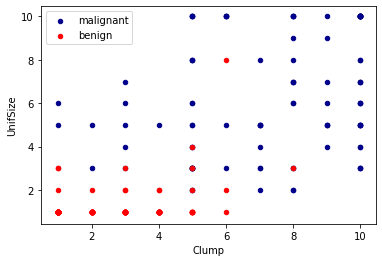

In [15]:
ax = cell_df[cell_df['Class']==4][0:100].plot(kind='scatter', x='Clump',y='UnifSize',color='DarkBlue', label='malignant');
cell_df[cell_df['Class']==2][0:100].plot(kind="scatter", x = 'Clump', y= 'UnifSize', color='red', label='benign' , ax=ax)
plt.show()

In [16]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [18]:
feature_df = cell_df[['Clump','UnifSize','UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [20]:
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state= 4)
print("traain set: ", X_train.shape, y_train.shape)
print("test set: ", X_test.shape, y_test.shape)

traain set:  (546, 9) (546,)
test set:  (137, 9) (137,)


In [25]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
mod = clf.fit(X_train, y_train)
mod

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
yhat = mod.predict(X_test)
yhat[0:10]

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2])

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [34]:
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_similarity_score(y_test, yhat))

0.9639038982104676
0.9635036496350365


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


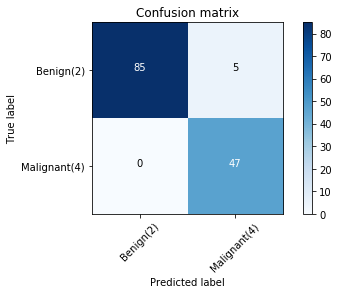

In [43]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [44]:
cnf_matrix

array([[85,  5],
       [ 0, 47]])